Mean Filter - MSE: 55.84, PSNR: 30.66 dB
Median Filter - MSE: 9.19, PSNR: 38.50 dB
Gaussian Filter - MSE: 63.29, PSNR: 30.12 dB


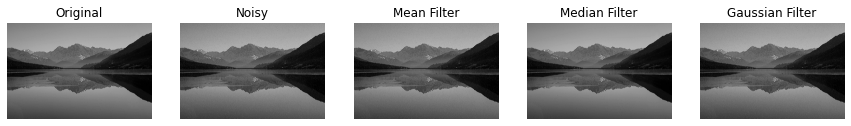

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.util import random_noise
from skimage.metrics import peak_signal_noise_ratio as psnr, mean_squared_error as mse

def add_noise(image, noise_type="salt_pepper", amount=0.02):
    if noise_type == "salt_pepper":
        noisy_image = random_noise(image, mode='s&p', amount=amount)
    elif noise_type == "gaussian":
        noisy_image = random_noise(image, mode='gaussian', var=0.01)
    else:
        raise ValueError("Unsupported noise type")
    return (noisy_image * 255).astype(np.uint8)

def apply_filters(noisy_image):
    mean_filtered = cv2.blur(noisy_image, (3, 3))
    median_filtered = cv2.medianBlur(noisy_image, 3)
    gaussian_filtered = cv2.GaussianBlur(noisy_image, (3, 3), 0)
    return mean_filtered, median_filtered, gaussian_filtered

def evaluate_performance(original, denoised):
    mse_value = mse(original, denoised)
    psnr_value = psnr(original, denoised, data_range=255)
    return mse_value, psnr_value

# Load grayscale image
image = cv2.imread('C:\\Users\\Student\\Documents\\Img processing\\image.jpg', cv2.IMREAD_GRAYSCALE)

if image is None:
    raise FileNotFoundError("Image not found. Make sure 'image.jpg' exists in the directory.")

# Add noise to the image
noisy_image = add_noise(image, "salt_pepper")

# Apply filters
mean_filtered, median_filtered, gaussian_filtered = apply_filters(noisy_image)

# Compute performance metrics
filters = {"Mean": mean_filtered, "Median": median_filtered, "Gaussian": gaussian_filtered}
for name, filtered_img in filters.items():
    mse_val, psnr_val = evaluate_performance(image, filtered_img)
    print(f"{name} Filter - MSE: {mse_val:.2f}, PSNR: {psnr_val:.2f} dB")

# Display results
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
axes[0].imshow(image, cmap='gray'); axes[0].set_title("Original")
axes[1].imshow(noisy_image, cmap='gray'); axes[1].set_title("Noisy")
axes[2].imshow(mean_filtered, cmap='gray'); axes[2].set_title("Mean Filter")
axes[3].imshow(median_filtered, cmap='gray'); axes[3].set_title("Median Filter")
axes[4].imshow(gaussian_filtered, cmap='gray'); axes[4].set_title("Gaussian Filter")

for ax in axes:
    ax.axis('off')

plt.show()
